# Aircraft registrations

Data retrieved on March 30 from http://registry.faa.gov/aircraftinquiry/StateCounty_Inquiry.aspx

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab
%matplotlib inline
matplotlib.style.use('ggplot')

import pandas

import pandas as pd, os

frames = []

data_dir = "data/registrations/"
for file in os.listdir(data_dir):
    print file
    frames.append(pd.read_csv(data_dir + file))

registrations = pd.concat(frames)
registrations.to_csv("data/ct_airplane_registrations_all.csv")


FAIRFIELD COUNTY 201603301314392738StateCounty.csv
HARTFORD 201603301318190972StateCounty.csv
LITCHFIELD 201603301315262293StateCounty.csv
MIDDLESEX 201603301318519582StateCounty.csv
NEW HAVEN 201603301315478867StateCounty.csv
NEW LONDON 201603301317015466StateCounty.csv
TOLLAND 201603301316065751StateCounty.csv
WINDHAM 201603301319503362StateCounty.csv


In [2]:
april_full_db = pd.read_csv("data/full_db/AR042016/MASTER.txt")

## Number of registrations in CT

In [3]:
## number of registrations in CT
max(registrations.count())

2344

In [4]:
registrations.columns

Index([u'n_number', u'serial_number', u'name', u'Street', u'city', u'state',
       u'Zip_Code', u'mfr_name', u'year_mfr', u'model_name',
       u'Cert_Issue_Date', u'AC_Weight', u'Type_Registrant'],
      dtype='object')

## Registrations by weight

There are 41 smalld rones registered in CT.

In [5]:
registrations["AC_Weight"].value_counts().to_frame()

,AC_Weight
Up to 12499,1875
20000 and over,273
12500 to 19999,155
UAV up to 55,41


## Drones per town

In [6]:
registrations[registrations["AC_Weight"] == "UAV up to 55"]["city"].value_counts()

SOUTHBURY       4
HARTFORD        3
CHESTER         3
WALLINGFORD     3
NEW BRITAIN     3
OLD SAYBROOK    2
BERLIN          2
CHESHIRE        2
MOODUS          2
RIDGEFIELD      2
SHELTON         1
DANBURY         1
CLINTON         1
EAST HAMPTON    1
NEW HAVEN       1
NORFOLK         1
EAST WINDSOR    1
BROOKFIELD      1
MILFORD         1
STAMFORD        1
STORRS          1
EAST HAVEN      1
NEW MILFORD     1
PORTLAND        1
FAIRFIELD       1
Name: city, dtype: int64

## Planes (not drones) per town

Greenwich has a lot of airplanes, especially for a place without an airport.

In [7]:
planes = registrations[registrations["AC_Weight"] != "UAV up to 55"]

planes["city"].value_counts().to_frame().head(10)

,city
NORWALK,260
GREENWICH,84
DANBURY,79
HARTFORD,67
SHELTON,53
STAMFORD,48
OXFORD,47
STRATFORD,44
FAIRFIELD,38
WEST HARTFORD,27


In [8]:
## Small planes per town

registrations[registrations["AC_Weight"] == "Up to 12499"]["city"].str.title().value_counts().to_frame().head(10)

,city
Danbury,65
Norwalk,62
Greenwich,60
Hartford,47
Stratford,32
Stamford,30
Fairfield,30
Ridgefield,25
Southbury,24
New Milford,24


In [9]:
## Medium planes per town

registrations[registrations["AC_Weight"] == "12500 to 19999"]["city"].str.title().value_counts().to_frame().head(10)

,city
Norwalk,43
Shelton,35
Danbury,12
Oxford,9
Greenwich,6
Hartford,6
West Hartford,5
Stamford,5
Stratford,4
Windsor Locks,3


In [10]:
## Big planes per town

registrations[registrations["AC_Weight"] == "20000 and over"]["city"].str.title().value_counts().to_frame().head(10)

,city
Norwalk,155
Greenwich,18
Oxford,14
Hartford,14
Stamford,13
Stratford,8
Fairfield,8
Windsor Locks,6
Wilton,5
Old Greenwich,4


In [11]:
registrations["Type_Registrant"].value_counts()

Corporation    1083
Individual     1066
Co-Owned        156
Partnership      24
Government       14
Other             1
Name: Type_Registrant, dtype: int64

## Top manufacturers

In [12]:
registrations["mfr_name"].value_counts().to_frame().sort_values(by="mfr_name", ascending=False).head(10)

,mfr_name
PIPER,455
CESSNA,451
BEECH,118
BOMBARDIER INC,78
BOEING,53
GULFSTREAM AEROSPACE,51
MOONEY,42
BEECHCRAFT CORP,39
CIRRUS DESIGN CORP,38
AIRBUS,33


### Top manufacturers by weight

In [13]:
def categories_report (df):
    count = 0
    tmp_df = df
    #tmp_df = tmp_df.reset_index(level=0,inplace=True)
    #tmp_df.columns=["id","category","count"]
    report_string = ""
    for row in (tmp_df).iterrows():
        if count == 10:
            break
        report_string += row[0].title() +  " (" + str(row[1]["mfr_name"]) + "); "
        #print row
        #report_string += str(row[1][1]).title() + " (" + str(row[1][2]) + "); "
        count += 1
    return report_string


In [14]:
def manuf_by_weight (weight):
    tmp_df = False
    tmp_df = planes[planes["AC_Weight"] == weight]["mfr_name"].value_counts().to_frame().sort_values(by="mfr_name", ascending=False)
    return categories_report(tmp_df)

print manuf_by_weight("Up to 12499");

Piper (455); Cessna (412); Beech (114); Mooney (42); Cirrus Design Corp (38); Grumman American Avn. Corp. (31); Aeronca (30); Raytheon Aircraft Company (21); Aerostar International Inc (20); Taylorcraft (16); 


In [15]:
print manuf_by_weight("12500 to 19999");


Beechcraft Corp (35); Cessna (32); Gulfstream Aerospace (14); Dassault (10); Pilatus (9); Dassault Aviation (8); Embraer (7); Raytheon Aircraft Company (6); Israel Aircraft Industries (6); Dassault-Breguet (5); 


In [16]:
print manuf_by_weight("20000 and over")

Bombardier Inc (78); Boeing (46); Gulfstream Aerospace (37); Airbus (33); Dassault Aviation (15); Douglas (9); Cessna (7); Dassault-Breguet (7); Canadair Ltd (5); Learjet Inc (4); 


In [17]:
registrations[registrations["mfr_name"] == "GULFSTREAM AEROSPACE"]

,n_number,serial_number,name,Street,city,state,Zip_Code,mfr_name,year_mfr,model_name,Cert_Issue_Date,AC_Weight,Type_Registrant
0,100DF,1313,CEF 2002 AIRCRAFT LLC,ATTN: AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,1997,G-IV,07/30/2004,20000 and over,Corporation
3,101MH,609,MCG LEASING LLC,745 HOLLOW TREE RIDGE RD,DARIEN,CT,06820-2002,GULFSTREAM AEROSPACE,2000,G-V,08/04/2014,20000 and over,Corporation
24,119LE,5333,MILLROCK AVIATION FINANCIAL LLC,ATTN AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,2011,GV-SP (G550),09/21/2011,12500 to 19999,Corporation
34,127GG,534,VESEY AIR LLC,ATTN AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,1997,G-V,05/23/2007,20000 and over,Corporation
35,128GV,5363,MILLROCK AVIATION FINANCIAL LLC,ATTN AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,2012,GV-SP (G550),08/27/2012,12500 to 19999,Corporation
83,1759C,5128,CANAL AIR LLC,ATTN: AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,2006,GV-SP (G550),01/11/2008,12500 to 19999,Corporation
101,1EB,5194,CFS AIR LLC,ATTN AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,2008,GV-SP (G550),08/18/2008,12500 to 19999,Corporation
142,236MJ,1177,RED LINE AIR LLC,ATTN AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,1991,G-IV,10/19/2005,20000 and over,Corporation
150,247EM,5265,CANAL AIR LLC,ATTN: AIRCRAFT TEAM 201 MERRITT 7,NORWALK,CT,06851-1056,GULFSTREAM AEROSPACE,2010,GV-SP (G550),05/21/2010,12500 to 19999,Corporation
200,300CR,1401,CRANE CO,100 FIRST STAMFORD PL,STAMFORD,CT,06902-6740,GULFSTREAM AEROSPACE,2000,G-IV,01/31/2014,20000 and over,Corporation


## Individually-owned planes

In [18]:
registrations["Type_Registrant"].value_counts()

Corporation    1083
Individual     1066
Co-Owned        156
Partnership      24
Government       14
Other             1
Name: Type_Registrant, dtype: int64

In [19]:
registrations[registrations["AC_Weight"] == "Up to 12499"]["city"].str.title().value_counts()

Danbury             65
Norwalk             62
Greenwich           60
Hartford            47
Stratford           32
Stamford            30
Fairfield           30
Ridgefield          25
Southbury           24
New Milford         24
Oxford              24
Groton              22
Glastonbury         22
Cheshire            22
West Hartford       22
Woodbury            21
Ellington           21
Milford             20
Newtown             20
Lisbon              20
Sherman             20
Westport            19
Somers              18
East Haven          18
Trumbull            18
Madison             18
New Canaan          17
Middlefield         17
Pawcatuck           17
Shelton             17
                    ..
Lakeside             1
Pleasant Valley      1
Unionville           1
Warren               1
Salisbury            1
Haddam               1
Preston              1
Huntington           1
Rowayton             1
Uncasville           1
Merrow               1
Redding              1
Northford  

In [20]:

registrations[(registrations["AC_Weight"] == "12500 to 19999") & (registrations["Type_Registrant"] == "Individual")]


,n_number,serial_number,name,Street,city,state,Zip_Code,mfr_name,year_mfr,model_name,Cert_Issue_Date,AC_Weight,Type_Registrant
289,3967A,53835,LYNCH CHARLES R,19 PARSONAGE RD,GREENWICH,CT,06830-3919,GRUMMAN,1945,TBM-3U,11/21/2012,12500 to 19999,Individual
488,626RB,560-0221,MILLARD ROBERT B,C/O GAMA AVIATION INC 700 GREAT ME...,STRATFORD,CT,06615-7584,CESSNA,1993,560,08/11/2000,12500 to 19999,Individual
729,84CQ,BB-691,REGISTRATION PENDING,C/O EAGLE AIR INC 81 KENOSIA AVE,DANBURY,CT,06810-7361,BEECH,1980,200,None,12500 to 19999,Individual
263,606KK,550-0200,KLEMENT KARL,41 CROSSROADS PLZ STE 119,WEST HARTFORD,CT,06117-2402,CESSNA,1980,550,10/31/2008,12500 to 19999,Individual
68,5222V,9484,MCBURNEY CRAIG M DBA,PO BOX 569,CHESTER,CT,06412-0569,CHANCE VOUGHT,1945,F4U-4,01/04/1995,12500 to 19999,Individual


In [21]:
registrations[(registrations["AC_Weight"] == "20000 and over") & (registrations["Type_Registrant"] == "Individual")]


,n_number,serial_number,name,Street,city,state,Zip_Code,mfr_name,year_mfr,model_name,Cert_Issue_Date,AC_Weight,Type_Registrant
465,613AA,24489,SALE REPORTED,15 RIVER RD STE 320,WILTON,CT,06897-4057,BOEING,1989,757-223,None,20000 and over,Individual
522,684AA,25341,SALE REPORTED,15 RIVER RD STE 320,WILTON,CT,06897-4057,BOEING,1992,757-223,None,20000 and over,Individual
523,685AA,25342,SALE REPORTED,15 RIVER RD STE 320,WILTON,CT,06897-4057,BOEING,1992,757-223,None,20000 and over,Individual
528,695AN,26975,SALE REPORTED,15 RIVER RD STE 320,WILTON,CT,06897-4057,BOEING,1994,757-223,None,20000 and over,Individual


## Oldest planes


In [22]:
registrations.sort_values(by="year_mfr")

,n_number,serial_number,name,Street,city,state,Zip_Code,mfr_name,year_mfr,model_name,Cert_Issue_Date,AC_Weight,Type_Registrant
138,6522K,788,DEYO KENNETH F,7 PEGS WAY,THOMASTON,CT,06787-1092,REPUBLIC,0,RC-3,05/19/2015,Up to 12499,Individual
269,618Y,3352,BROWN ALEXANDER C III,PO BOX 511,MARLBOROUGH,CT,06447-0511,WACO,1930,INF,05/25/2000,Up to 12499,Individual
31,12611,1013,HODGDON THEODORE E III,1 ROLF DR,DANBURY,CT,06810-7220,FAIRCHILD,1931,22 C7A,03/13/2014,Up to 12499,Co-Owned
17,11478,3559,TAYLOR DANIEL J,389 JELLIFF MILL RD,NEW CANAAN,CT,06840-6515,WACO,1932,QCF,09/14/2001,Up to 12499,Individual
5,14535,A-430,FERS MITCHELL A,89 HOPYARD RD,STAFFORD SPRINGS,CT,06076,AERONCA,1934,C-3,06/08/1982,Up to 12499,Co-Owned
31,14614,4236,CONNECTICUT AERONAUTICAL HISTORICAL ASSO INC D...,BRADLEY INTERNATIONAL AIRPORT 36 PERIMETER RD,WINDSOR LOCKS,CT,06096-1069,WACO,1935,YKC-S,08/03/2009,Up to 12499,Corporation
16,15076,2683,LOEWENHARDT HUBERT H,835 NEW LONDON TURNPIKE,STONINGTON,CT,06378,FAIRCHILD,1935,24 C8C,01/12/1994,Up to 12499,Individual
571,731,75045,PUMBA INVESTMENTS LLC,31 BROOKSIDE DR,GREENWICH,CT,06830-6422,BOEING,1937,A75,07/27/2011,Up to 12499,Corporation
507,65101,75-091,CULLEN CLAY T,53 MIRY BROOK RD,DANBURY,CT,06810-7408,BOEING,1937,A75N1(PT17),11/20/2013,Up to 12499,Individual
12,18134,1001,BUSQUE DALE A,131 ROUTE 6,ANDOVER,CT,06232-1025,STEPHENS,1937,RS-1,03/24/1978,Up to 12499,Co-Owned


## Age of planes

In [23]:
planes["year_mfr"].mode()

0    1946
dtype: float64

In [24]:
## How many 1946 planes are there?
max(planes[planes["year_mfr"] == 1946].count())


86

In [25]:
#3 What model are these 1946 planes?

planes[planes["year_mfr"] == 1946][["mfr_name","model_name"]]

#planes[planes["year_mfr"] == 1946]["mfr_name"].value_counts()
planes[planes["year_mfr"] == 1946][["mfr_name","model_name"]].groupby(["mfr_name","model_name"]).count()

Empty DataFrame
Columns: []
Index: [(AERONCA, 11AC), (AERONCA, 7AC), (AERONCA, 7DC), (BEECH, G17S), (CESSNA, 120), (CESSNA, 140), (CHAMPION, 7AC), (CHAMPION, AERONCA 7AC), (COMMONWEALTH, 185), (CULVER, V), (DOUGLAS, DC3C), (ENGINEERING & RESEARCH, 415-C), (ENGINEERING & RESEARCH, ERCOUPE 415-C), (ERCOUPE, 415-C), (FORNEY, 415-C), (GLOBE, GC-1A), (GLOBE, GC-1B), (GRUMMAN, G-44A), (LUSCOMBE, 8A), (LUSCOMBE, 8E), (NORTH AMERICAN, NAVION), (PIPER, J-3C), (PIPER, J3C-65), (PIPER, J3C-65S), (PIPER, PA-12), (SILVAIRE, LUSCOMBE 8A), (STINSON, 108-1), (TAYLORCRAFT, BC12-D), (TAYLORCRAFT, BF), (THORP AIRCRAFT CO, T-211)]

In [26]:
planes["year_mfr"].median()


1980.0

<module 'matplotlib.pyplot' from '/Library/Python/2.7/site-packages/matplotlib-override/matplotlib/pyplot.pyc'>

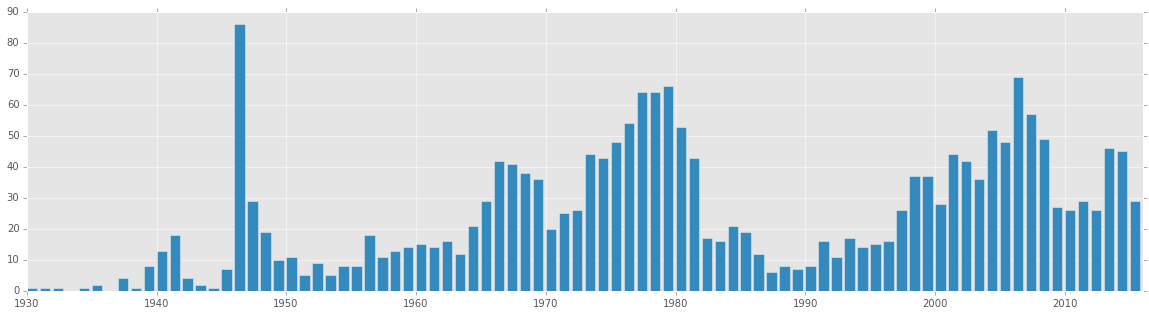

In [27]:
import numpy as np
matplotlib.style.use('ggplot')

pyear = planes["year_mfr"].value_counts().reset_index().sort_values(by="index")
pyear.columns=["year","count"]
pyear

plt.figure(figsize=(20,5), dpi=400)

plt.bar(pyear["year"],pyear["count"],label="aircraft count")
plt.xlim(1930,2016)
plt

In [28]:
pyear_small =  planes[planes["AC_Weight"]=="Up to 12499"]["year_mfr"].value_counts().reset_index().sort_values(by="index")
pyear_small.columns=["year","count"]


pyear_med =  planes[planes["AC_Weight"]=="12500 to 19999"]["year_mfr"].value_counts().reset_index().sort_values(by="index")
pyear_med.columns=["year","count"]


pyear_lg =  planes[planes["AC_Weight"]=="20000 and over"]["year_mfr"].value_counts().reset_index().sort_values(by="index")
pyear_lg.columns=["year","count"]

pyear_all = pd.merge(pyear_small,pyear_med,on="year",how="outer")
pyear_all = pd.merge(pyear_all,pyear_lg,on="year",how="outer")

pyear_all.columns=["year","small planes","medium planes","large planes"]

pyear_all["year"]= pyear_all["year"].astype(int)

pyear_all.set_index("year").sort_index().to_csv("year_by_weight.csv")

#plt.bar(pyear_all["year"],pyear["small"],label="aircraft count")
#plt.xlim(1930,2016)
#plt
#pyear_all[["year","small"]].set_index("year").plot.bar(figsize=(20,5))
#pyear_all[["year","medium"]].set_index("year").plot.bar(figsize=(20,5))
#pyear_all[["year","large"]].set_index("year").plot.bar(figsize=(20,5))
#plot = pyear_all.set_index("year").plot.bar(subplots=True,sharex=True,figsize=(10,10),ylim=[0,100],rot=20,fontsize=14)


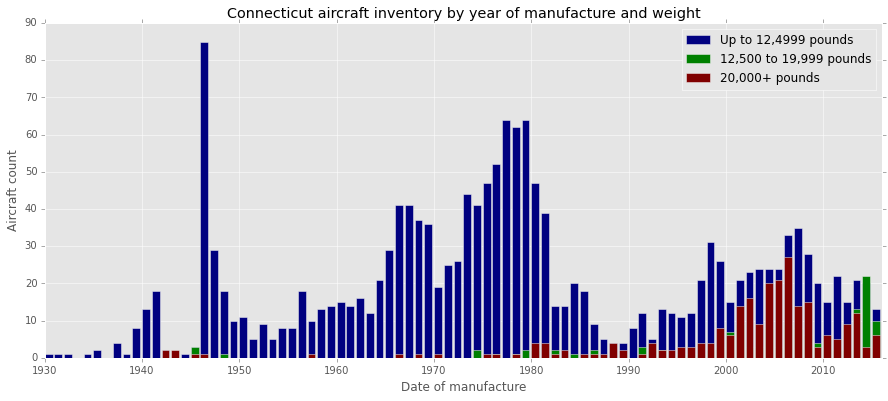

In [39]:
plt.figure(figsize=(15,6))
plt.bar(pyear_small["year"],pyear_small["count"],label="Up to 12,4999 pounds",color="navy")
plt.bar(pyear_med["year"],pyear_med["count"],label="12,500 to 19,999 pounds",color="green")
plt.bar(pyear_lg["year"],pyear_lg["count"],label="20,000+ pounds",color="maroon")
plt.title("Connecticut aircraft inventory by year of manufacture and weight")
plt.ylabel("Aircraft count")
plt.xlabel("Date of manufacture")
plt.xlim(1930,2016)
plt.ylim(0,90)
plt.savefig("mfr_year_counts.jpg",transparent=True, bbox_inches="tight")
plt.legend()


Up to 12499	5625
20000 and over	819
12500 to 19999	465
UAV up to 55	

In [30]:
planes[planes["AC_Weight"] == "Up to 12499"]["year_mfr"].median()


1977.0

In [31]:
planes[planes["AC_Weight"] == "12500 to 19999"]["year_mfr"].median()


2006.0

In [32]:
planes[planes["AC_Weight"] == "20000 and over"]["year_mfr"].median()


2004.0

## Top plane owners

In [33]:
planes["name"].value_counts()

WHEELS UP PARTNERS LLC                       35
AVN AIR LLC                                  29
MILLROCK AVIATION FINANCIAL LLC              19
GC AIR LLC                                   19
REGISTRATION PENDING                         16
VESEY AIR LLC                                15
SIMMONS AVIATION SERVICES LLC                14
CANAL AIR LLC                                14
SIKORSKY AIRCRAFT CORP                       12
JED HOMES INC                                11
AFS INVESTMENTS 56 LLC                       11
SALE REPORTED                                11
AFS INVESTMENTS 67 LLC                       10
AFS INVESTMENTS 71 LLC                        9
INTERNATIONAL AVIATION LLC                    9
CHESTER CHARTER INC                           8
RED LINE AIR LLC                              8
HELIFLEET 2015 LLC                            8
AFS INVESTMENTS 55 LLC                        8
AFS INVESTMENTS 72 LLC                        7
UNITED TECHNOLOGIES CORP                

In [34]:
## A lot of planes are owned by companies with AFS investments in the title.

planes[(planes["name"].str.contains("AFS INVESTMENTS"))]

,n_number,serial_number,name,Street,city,state,Zip_Code,mfr_name,year_mfr,model_name,Cert_Issue_Date,AC_Weight,Type_Registrant
60,154GJ,10224,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,10/25/2005,20000 and over,Corporation
61,155GJ,10225,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,10/26/2005,20000 and over,Corporation
64,156GJ,10227,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,10/31/2005,20000 and over,Corporation
65,157GJ,10230,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,12/08/2005,20000 and over,Corporation
66,158GJ,10237,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,12/21/2005,20000 and over,Corporation
67,159GJ,10238,AFS INVESTMENTS 73 LLC,ATTN OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2005,CL-600-2C10,12/22/2005,20000 and over,Corporation
70,161GJ,10253,AFS INVESTMENTS 67 LLC,ATTN: OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2006,CL-600-2C10,04/27/2006,20000 and over,Corporation
71,162GJ,10254,AFS INVESTMENTS 67 LLC,ATTN: OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2006,CL-600-2C10,04/27/2006,20000 and over,Corporation
72,163GJ,10255,AFS INVESTMENTS 67 LLC,ATTN: OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2006,CL-600-2C10,04/27/2006,20000 and over,Corporation
75,164GJ,10256,AFS INVESTMENTS 67 LLC,ATTN: OPERATIONS LEADER 901 MAIN AVE,NORWALK,CT,06851-1168,BOMBARDIER INC,2006,CL-600-2C10,04/28/2006,20000 and over,Corporation


In [35]:
## COunt them all up

print "Total AFS Investments*: " + str(planes[planes["name"].str.contains("AFS INVESTMENTS")]["name"].value_counts().sum())
print "      Total in Norwalk: " + str(planes[planes["name"].str.contains("AFS INVESTMENTS") & (planes["city"] == "NORWALK")]["name"].value_counts().sum())

Total AFS Investments*: 88
      Total in Norwalk: 88


In [36]:
# http://www.sec.gov/Archives/edgar/data/1271193/000092153005000513/0000921530-05-000513.txt

In [37]:
planes[planes["Street"].str.contains("MERRITT 7")]["name"].value_counts()

AVN AIR LLC                        29
MILLROCK AVIATION FINANCIAL LLC    19
GC AIR LLC                         19
VESEY AIR LLC                      15
CANAL AIR LLC                      14
HELIFLEET 2015 LLC                  8
RED LINE AIR LLC                    8
PATH AIR LLC                        7
CFS AIR LLC                         7
CEF 2002 AIRCRAFT LLC               4
NATIONS FUND I LLC                  2
AFS INVESTMENTS 68 LLC              1
HELIFLEET 2015  LLC                 1
HIGH LINE AIR LLC                   1
HELI FLEET 2015 LLC                 1
Name: name, dtype: int64

GE Finance-related plane owners:

AVN AIR LLC: http://www.sec.gov/Archives/edgar/data/1071739/000095013704001221/c83064exv10w31.txt
MILLROCK AVIATION FINANCIAL LLC: 
https://opencorporates.com/companies/us_ct/1025957
GC AIR LLC:
http://www.bloomberg.com/Research/stocks/private/snapshot.asp?privcapId=259771713
https://casetext.com/case/gc-air-llc-v-rancharrah-mgmt

VESEY AIR LLC:
http://www.law360.com/articles/316677/insurer-ducks-6m-suit-over-coverage-for-smashed-plane
http://www.jetphotos.net/info/showinfo.php?id=LEAR-60-095
http://www.entitysource.com/details/entity/ri_124201/vesey-air-llc

CANAL AIR LLC:
https://www.gpo.gov/fdsys/granule/USCOURTS-mied-2_11-cv-11081/USCOURTS-mied-2_11-cv-11081-1
http://www.wbng.com/news/local/Judge-strips-Endicott-Interconnect-of-corporate-jet-207318581.html?m=y&smobile=y

HELIFLEET 2015 LLC


RED LINE AIR LLC                    8
PATH AIR LLC                        7
CFS AIR LLC                         7
CEF 2002 AIRCRAFT LLC               4
NATIONS FUND I LLC                  2
AFS INVESTMENTS 68 LLC              1
HELIFLEET 2015  LLC                 1
HIGH LINE AIR LLC                   1
HELI FLEET 2015 LLC                 1


In [38]:
planes[planes["name"].str.contains("AFS INVESTMENTS")]["name"].value_counts()

AFS INVESTMENTS 56 LLC       11
AFS INVESTMENTS 67 LLC       10
AFS INVESTMENTS 71 LLC        9
AFS INVESTMENTS 55 LLC        8
AFS INVESTMENTS XIV LLC       7
AFS INVESTMENTS 72 LLC        7
AFS INVESTMENTS 68 LLC        6
AFS INVESTMENTS 73 LLC        6
AFS INVESTMENTS 54 LLC        5
AFS INVESTMENTS 57 LLC        4
AFS INVESTMENTS 69 LLC        2
AFS INVESTMENTS 48 LLC        2
AFS INVESTMENTS 58 LLC        2
AFS INVESTMENTS 59 LLC        1
AFS INVESTMENTS 52 LLC        1
AFS INVESTMENTS XL-C LLC      1
AFS INVESTMENTS XIX LLC       1
AFS INVESTMENTS XXI LLC       1
AFS INVESTMENTS XX LLC        1
AFS INVESTMENTS XVIII LLC     1
AFS INVESTMENTS 70 LLC        1
AFS INVESTMENTS XXII LLC      1
Name: name, dtype: int64

AFS INVESTMENTS 56 LLC:
    http://www.bloomberg.com/research/stocks/private/snapshot.asp?privcapId=33151307
        
AFS INVESTMENTS 67 LLC       10
AFS INVESTMENTS 71 LLC        9
AFS INVESTMENTS 55 LLC        8
AFS INVESTMENTS XIV LLC       7
AFS INVESTMENTS 72 LLC        7
AFS INVESTMENTS 68 LLC        6
AFS INVESTMENTS 73 LLC        6
AFS INVESTMENTS 54 LLC        5
AFS INVESTMENTS 57 LLC        4
AFS INVESTMENTS 69 LLC        2
AFS INVESTMENTS 48 LLC        2
AFS INVESTMENTS 58 LLC        2
AFS INVESTMENTS 59 LLC        1
AFS INVESTMENTS 52 LLC        1
AFS INVESTMENTS XL-C LLC      1
AFS INVESTMENTS XIX LLC       1
AFS INVESTMENTS XXI LLC       1
AFS INVESTMENTS XX LLC        1
AFS INVESTMENTS XVIII LLC     1
AFS INVESTMENTS 70 LLC        1
AFS INVESTMENTS XXII LLC      1